In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
from datetime import datetime


I used microsoft word online to transmit speech to text from this youtube video - https://www.youtube.com/watch?v=qGFoZ8yodc4 \
The video is a Zoom meeting \
the text is stored in the variable txt.

More features: 
1. per user - stability of talking pace
2. volume

In [19]:
txt = """
00:00:02 Speaker 1 
Hi, this is Eric Johnson. It's February 18th, 2021 and this is the engineering key review at GitLab. So I've got #4 in the agenda, which is a proposal to break up this meeting into four department key review. So currently this is engineering. 
00:00:21 Speaker 1 
Being development, quality, security and UX infrastructure and support do their own queue reviews already. I have the reasons why increased visibility able to go deeper increased the objectivity with which my reports can manage their groups, allow me more time to focus on new markets. 
00:00:43 Speaker 1 
And allow me to shift into more of a question asker mode than generating content and answering questions in these. 
00:00:50 Speaker 1 
And but to avoid adding three net new meetings to stakeholders calendars, I propose we do a sort of two-month rotation. So month one development quality go month two security and UX would go. 
00:01:05 Speaker 1 
How do people feel about that proposal? 
00:01:08 Speaker 2 
I think in the group conversations it's working really well, so I'm, I'm supportive and. 
00:01:17 Speaker 2 
This is the smallest thing. Maybe we need 4 meetings a month like it's the biggest apartment. It's super essential. But you proposed this. I don't. I could see either way. So let's stick with the proposal. 
00:01:32 Speaker 1 
Cool. We'll try it and we'll we can be flexible. I mean, the development is larger, maybe they go more frequently or. 
00:01:37 Speaker 1 
Something at that? We'll see how it see how it goes. 
00:01:41 Speaker 1 
All right. And then I've got #5, which is we've got R&D overall Mr. rate and we also have R&D wider Mr. rate both as top level KPI's for engineering. So the difference between them in the simplest sense is that. 
00:02:00 Speaker 1 
R&D wider MMR rate includes both community contributions and community MR's. 
00:02:07 Speaker 1 
The problems I see with this are that one the wider MMR rate, the one that includes internally and external MR's it duplicates the overall rate, which is. 
00:02:17 Speaker 1 
A probability metric. 
00:02:18 Speaker 2 
Sorry, sorry, sorry. The, the, the, the wider Mr. rates should just be external, right? 
00:02:25 Speaker 2 
And an overall should be narrow plus wider. 
00:02:31 Speaker 1 
Oh yeah. 
00:02:31 Speaker 2 
Like we say, the wider community. 
00:02:35 Speaker 1 
Right, right, right. OK. So there's. 
00:02:39 Speaker 1 
I'll have to check the taxonomy. 
00:02:44 Speaker 3 
Lilly, can you can you confirm? So sorry, that's that's side reasoning is my understanding as well. 
00:02:50 Speaker 4 
Yeah, I believe water, Mr. rate just captures Community contributions. 
00:02:57 Speaker 1 
Only and no internal. 
00:02:59 Speaker 2 
And the reason we measure that is that like one of the most likely failure modes is that we lose the community. 
00:02:59 
Correct. 
00:03:07 Speaker 1 
Yeah. 
00:03:08 Speaker 3 
So where it gets? 
00:03:09 Speaker 3 
Eric, where it gets Goofy is, is that when you look at a specific team within the company, there could be contributions outside of that that aren't community contributions. They would be viewed community contributions by that group. But effectively they're not from outside the company. So that's why we use wider to kind of reflect that and narrow is very specific. 
00:03:29 Speaker 3 
To the team. 
00:03:31 Speaker 1 
Are you saying that if someone in plan contributes to verify it's viewed as wider? 
00:03:37 Speaker 3 
Not quite that plan. Plan and verify or just fine. It's when you look at like the development versus infrastructure, infrastructure will oftentimes contribute to developments. 
00:03:47 Speaker 3 
Work, but it won't be counted as Mrs. 
00:03:51 Speaker 1 
OK, that's a that's a potential bit of funkiness that we should talk about separately. I didn't have that in my sort of critique of this, but that that doesn't necessarily make intuitive sense to. 
00:04:03 Speaker 1 
So. So then I think part of my critique of this can be thrown out because it's not as duplicative as I thought, but I still think there's a problem with R&D wider Mr. rate, which is this thing, doesn't really move in part because it's a, it's a rate. So it feels like the way to drive this up is to specifically. 
00:04:21 Speaker 1 
Drive community authors to contribute more than one Mr. per month. That's how this moves up, because it's a it's a productivity rate like we use internally, and that doesn't necessarily feel like the right thing because there's scenarios in which this goes up, we've actually got less contributions overall and less contributors overall. 
00:04:38 Speaker 2 
Wait, wait, wait, wait a second. So you you're saying that R&D wider M rate is number MR's per external contributor? 
00:04:49 Speaker 2 
Ohh my goodness, that should not be the thing it should be. 
00:04:54 Speaker 2 
Contributions per GitLab team member. So to contribute those. 
00:04:59 Speaker 2 
The the the thing above the division. 
00:05:04 Speaker 2 
Is the external ones. The thing below is the number of team members at GitLab. 
00:05:10 Speaker 1 
Is that the case slowly? 
00:05:13 Speaker 4 
I'm checking right now. 
00:05:17 Speaker 4 
I think so in our numerator. 
00:05:17 
It says. 
00:05:18 Speaker 2 
March, March for team members. So unless we start calling people outside the company team member, then it shouldn't be done. 
00:05:26 Speaker 4 
Yeah, just clarifying here. So our numerator is community contributions and then our denominator is GitLab team members. So it's not per. 
00:05:36 Speaker 4 
External member. 
00:05:47 Speaker 2 
So we so So what? 
00:05:49 Speaker 2 
We're doing there, Eric, is we're we're not trying to say how many, how many MMR does someone send if they send something or saying how many MR's from external do we get for the size of our organization. 
00:06:16 Speaker 1 
Sorry, I have a childhood emergency outside the door. 
00:06:19 
Yeah. 
00:06:22 Speaker 2 
So so maybe explain the context behind this. The context is as we grow as a company, we should make sure we we keep the Community up like the logical thing is for the Community to flatline and the size of the York to grow. And before you know it, you've kind of outgrown the wider community. 
00:06:41 Speaker 1 
Yeah. And what I'm seeing is we, we created this pretty sophisticated taxonomy with prefixes and postfixes to talk about these things. But in reality, we've only got two of them and it's we keep forgetting we have a hard time discussing this thing, so. 
00:06:54 Speaker 1 
Either just name them simply two names for what they are rather than than using the taxonomy, but also like in FI have this proposal of like, what if we just tracked as a KPI the percentage of total and ours that come from the community over time and. 
00:07:10 Speaker 1 
We would see that drop. 
00:07:10 Speaker 2 
OK, I love that. I love that. Let's do that instead. But the, the, the, the thing, the thing why we have this complex thing is because you can game that you want to game that you just produce fewer Mars with the engineers that get. 
00:07:14 Speaker 1 
OK. 
00:07:15 
Thank. 
00:07:28 Speaker 2 
So if you drive that really hard and say this is your number one goal, it's very easy to achieve. You just tell all your engineers to produce half. 
00:07:37 Speaker 1 
Yeah. So we have we have different metrics to prevent that from happening the same way that like support, SLA's and S SAT kind of buttress one another. I think we're we're robust to that, but simplifying this would make these conversations go. 
00:07:49 Speaker 2 
If if you, as our CTO don't even understand them, we went overboard, so I'm supportive. 
00:07:55 Speaker 1 
You'd understand them and I forgot. And I was agreeing to stuff this morning. Like there's a problem with. 
00:08:00 Speaker 1 
And then you just remind me of the context. So yeah, if. 
00:08:02 Speaker 1 
I can't hold it in my head from. 
00:08:03 Speaker 2 
Percentage that come from the community. I love that it's what all our investors ask about. Let's do that. 
00:08:08 Speaker 1 
OK, cool. So, Lily, if you can work with Max to make that transition, that would be great. And I'll bold the one that we're talking about and that's Roman numeral 3. Thanks. 
00:08:20 Speaker 5 
I'm on the call. Sorry I was a bit late timeline. We do have API's on the raw number of Community Mars and we can make make the shift and why they're confirming from the definition I think why they're only counts for community and and that's that's what the definition is. 
00:08:39 Speaker 1 
Cool. 
00:08:40 Speaker 1 
All right. So number six then, Christopher. 
00:08:47 Speaker 3 
So I was looking up to see if I had the percentage graph because I think we played around with this at one point and had a draft of that probably about five months back. If I can remember Lilly, just an FYI, the month of February if you were looking at any particular metrics particularly in development and MRA. 
00:09:08 Speaker 3 
We haven't had updates in four days, so there's apparently a lag issue that's been problematic for the data team to basically get. 
00:09:17 Speaker 3 
Updated message, updated metrics and they're working on that. 
00:09:23 Speaker 6 
I'm sorry, Mike, you got the next one. 
00:09:28 Speaker 5 
So yeah, I I there's some some color there on, on the, on mitigation the the lag later on. 
00:09:34 Speaker 5 
Onto. 
00:09:36 Speaker 5 
On to seven. We continue as an FYI, in addition to the KPI status. 
00:09:40 Speaker 6 
I'm sorry, Mac. I wanted to just touch on the Postgres replication issue there real quick. I've I've been trying to get my arms wrapped around it. 
00:09:41 Speaker 5 
Correct. 
00:09:50 Speaker 6 
Do we have the? 
00:09:51 Speaker 6 
Right, attention to this, this is. 
00:09:53 Speaker 6 
Kind of, Eric, I don't. 
00:09:55 Speaker 6 
Know if you were commenting on. 
00:09:58 Speaker 6 
Hinting towards this in the last meeting around some of the infrastructure improvements on the product side, I'm just not quite sure whose responsibility it is to focus on getting a handle on some of the constraints we have in replication. 
00:10:12 Speaker 1 
Yeah. The what I was mentioning in the in the product key review about an hour ago is I think it's sort of like unrelated. And so I think the DRI needs to be your kind of data engineering team. But of course, there's a dependency on infrastructure because that's where the data is being piped from. They they do own that data source. 
00:10:30 Speaker 7 
Yeah, I'll say for. 
00:10:31 Speaker 7 
The replication lag on that slave host where I'm sorry, not the on the the. 
00:10:38 Speaker 7 
Secondary host where the data is being pulled from, like the infrastructure would be the DRI for that. And so any escalations, but I'll I'll own those and I know we have an action plan for that. As far as creating another dedicated host just for the the data team to pull from. 
00:10:58 
OK. 
00:11:00 Speaker 6 
I did ask. I saw that issue and I did talk to Craig Gomes a little bit as well. On the database side, just to see if there's some database improvements and I'm still trying to figure out, you know, if it's truly just dedicated computational sort of resources server or. 
00:11:18 Speaker 6 
If there's actually some database tuning that needs to occur, do you? 
00:11:22 Speaker 6 
Have a sense of that. 
00:11:24 Speaker 7 
There's. So I'd say it's it's three different things. It's having a a dedicated host that doesn't have conflicting query traffic coming from other other workloads. There are some tuning performance or tuning improvements to be made. And then there's also. 
00:11:44 Speaker 7 
Improvements in and this is where it does maybe relate a little bit to what the topic was in the in the last review. Basically the the overall. 
00:11:54 Speaker 7 
Demand on the database layer from from.com activities and and like improving those. So it's it's definitely not just one of those things that one of the the most specific actions we're going to take though is separating out and having a dedicated house. So that we're just dealing with the the profile of the data. 
00:12:13 Speaker 7 
Engineering traffic on there and and not having conflicting query. 
00:12:20 Speaker 7 
Conflicting queries affect the ability to to update the replication. 
00:12:27 Speaker 6 
Steve, I definitely want to partner with you on this one because I don't. I think the the demand on those databases is only going to increase, it's not going down. And I think we need to get, I'm still unclear. 
00:12:39 Speaker 6 
On where to focus in to get the biggest bang for the buck. I think if the computational resource dedication that's going to be a good thing, but I'll probably going to squeeze the balloon. 
00:12:48 Speaker 6 
And then the next area will will unearth itself. 
00:12:52 Speaker 7 
OK, I'll tell you. I'll put into the impromptu review for next week. 
00:12:56 Speaker 7 
Basically an update on on this issue. 
00:12:59 Speaker 6 
Thank you, Steve. 
00:13:06 Speaker 1 
So then back to Meccan 7. 
00:13:08 Speaker 1 
Or. 
00:13:10 Speaker 1 
Yes. 
00:13:14 Speaker 5 
Thank you. And Rob was in the Assassin's agent this morning as well. Brian, just we have the attention there #7 just provide provide an update on previous conversations, we continue to improve defect tracking and against slos. There is a first iteration Pi that we are experimenting to show. 
00:13:33 Speaker 5 
Percentage of defects meeting the Slos key findings as ones are hovering at 80% as two at 60. We've been focused mostly on S1S2 at this point as hence why S3 and S fours are are low. 
00:13:48 Speaker 5 
Sure. 
00:13:49 Speaker 5 
And this will likely be the case. We are also in point B are working on the measurement for average open box age. This would give us a whole picture of what's what's left if the age goes up or down would be or clean the backlog. The average age should go down as well. There's no Pi yet, but I just want to update. 
00:14:09 Speaker 5 
And and sure beyond this, it's not, it's. 
00:14:11 Speaker 5 
Not a off track. 
00:14:14 Speaker 5 
Number C Craig on S2. 
00:14:17 Speaker 8 
Yeah, I just, I was looking through the the the charts and I I noted that there was a spike in mean time to close and just wanted to see if you had any insight into that for us this is? 
00:14:26 Speaker 8 
The S2. 
00:14:27 Speaker 8 
S The S1 looked fine. So. 
00:14:29 Speaker 5 
Yeah, this is where the point B on H supplement those charts in the back end helps. So I haven't seen a dip in age nor the count overall. I I think I think it's the latter. We needed to dig in a bit deeper in that and also the data lag, I would like to reevaluate when we have the whole picture when everything. 
00:14:47 Speaker 5 
Is synced in as well. 
00:14:50 Speaker 5 
Christy, you have some insights. 
00:14:55 Speaker 9 
Yeah, I'm just wondering if part of this could be the fact that we changed the severity across the board for MRI's to S2 and so we may have some older bugs in there that hadn't been addressed because they were at a lower severity. Now we've moved them to S2 and maybe that caused a little spike. 
00:15:15 Speaker 5 
That that could be the. 
00:15:16 Speaker 5 
Case if we did it in a limited fashion, it won't be a huge volume. We also iterated after that to to P9 priority. Since product owns prioritization, so I I wouldn't account it entirely to that. 
00:15:30 Speaker 1 
I mean this this isn't the infer key review, but. 
00:15:35 Speaker 1 
I know that they've gotten backed up on on those issues, so if some some good portion of those are are in for created or related then that might be lifting it as well. 
00:15:47 Speaker 5 
I can take the the deeper dig in and then provide an update next time. I think we need extra debug slicing of the data here. 
00:16:01 
You. 
00:16:02 Speaker 5 
Said you would like to go to .8. 
00:16:06 Speaker 2 
Yeah, we are now measuring S1S2. SO achievement with closed bug. 
00:16:12 
Thanks. 
00:16:13 Speaker 2 
But if you then look at the the number of bugs, it's exponential growth. 
00:16:20 Speaker 2 
And then it will be trivial to to achieve 100% slow achievement. 
00:16:28 Speaker 2 
If you just look at closed bugs, even though there would be a major problem in the company, 99% of all bugs are overdue. 
00:16:36 Speaker 2 
As long as I only close ones that are still within the SLO, I'll have great achievement. So I think we shouldn't be looking at the closed folks. I think we should be looking at open bucks, the entire population or percentage of doses within the SLO time. I think we're doing it the wrong way. 
00:16:56 Speaker 5 
Thanks for the thanks for the feedbacks that. 
00:16:59 Speaker 5 
Hence why we wanted to have the average age to to measure what's outside in the open. We can make this duration to measure, also measure focus on the the age of all opened, including open bugs. This is also something we I have discussed with Christopher in the next iteration as well and we're happy. 
00:17:19 Speaker 5 
More than happy to add. 
00:17:20 
Yes. 
00:17:21 Speaker 5 
So the the key. Yeah, go ahead. 
00:17:23 Speaker 2 
So average age would get closer to it. It's not what I'm proposing. What I'm proposing is of the open bugs. What percentage is outside of solo, so display it as a percentage. You do now just do it about the open box, not. 
00:17:36 Speaker 2 
The closed ones. 
00:17:37 Speaker 5 
Ah, got it. OK. 
00:17:39 Speaker 5 
The exceeding aslo for open bugs. 
00:17:43 Speaker 2 
Yeah, or open bugs that are within slow. So you have a chart that should go up and to the right like everything else. 
00:17:53 Speaker 5 
Sounds great. We can take it to the next data metrics work stream. 
00:17:58 Speaker 5 
To deliver with this. Cool. Thanks. 
00:18:01 Speaker 1 
Is there might be a little tricky, Mike. You'll have to figure out how to, because we like to be able to have charts that we can historically reconstruct if we need to. So when tickets close out, you need to go through their history to figure out at best time when it was open, did it breach the solo or. 
00:18:01 Speaker 5 
These are for. 
00:18:02 Speaker 5 
You. Yeah, go ahead. 
00:18:18 Speaker 2 
Not that's a good point. This might be much harder. 
00:18:21 Speaker 2 
Computationally, so I I totally respect if we can do it for that reason. 
00:18:32 Speaker 1 
Cool 9 Craig. 
00:18:36 Speaker 8 
Yeah. I just wanted to ask the team like I I went through all the the key meeting metrics, everything looked in line with prior periods and look good. Is there anything the team wants to call out supposedly that we should be watching? 
00:18:49 Speaker 9 
Yeah, I'll call out SUS. 
00:18:52 Speaker 9 
So the good news is in Q4 we had our smallest decline for several quarters. So we only went down by a tenth of a point the quarter previous was .6 or 6/10 of a point and the quarter before that was a full point, so. 
00:19:10 Speaker 9 
We see this as an improvement, even though it was still a decline, but it's still a decline. Obviously, we want this actually tracking. 
00:19:18 Speaker 9 
In an upward direction, we also don't have enough data to know whether or not this is an actual real trend up, so I'm optimistic. I think this is a good thing. We have had a much keener focus on SUS over the past several quarters. So that's why I think, OK, the work that we've done, I think actually is catching up and. 
00:19:37 Speaker 9 
And getting noticed in SUS. But we got to keep an eye on it. We can't, we cannot assume that that's the case. 
00:19:51 Speaker 3 
Yeah, and and the bug discussion above just kind of points out that like we have an underlying problem right now in our metrics measurement. So if we change the measurements to reflect that, then hopefully we're in good shape. If we don't and we flatline and address it so that we flatline open S ones and S twos, you will see a temporary jump in and. 
00:20:10 Speaker 3 
Of slos and as we clear out that backlog over that period of time. 
00:20:17 Speaker 1 
And I have Point C which is similar to infrastructure. We need to get more security work prioritized or hearing that from the team, but neither that problem nor that activity is sort of currently reflected in our security metrics. So we have some work to do long term to to make sure the we we see things like that in the metrics and and the measurements that we're making. 
00:20:42 Speaker 1 
So back to you said 10. 
00:20:45 Speaker 2 
You had a narrow Mr. rate, seems significantly below target and maybe I I hope that it would bounce back from December. I think it bounced back but not back on target any any contacts there what's what's going on? 
00:21:03 Speaker 3 
Yeah. So with family and friends days, we actually had some heavier vacation days in January than we historically have. One thing to note is that we are actually at a higher MMR rate. If you look at, if you go back the last 18 months. 
00:21:23 Speaker 3 
Or actually higher in room rate than we were back in. 
00:21:28 Speaker 3 
Each month this year, so if you compare October to October, November to November and in January, I'm sorry, October, November, December and January comparatively to last year, which you'll find is we're between a half point and a 1.5 Mr. rate above where we were in the month of previous year. 
00:21:48 Speaker 2 
That's that's great. Contact. Thank you, Christopher. Good work. 
00:21:52 Speaker 3 
Yeah. So the expectation is, is that February is a short month we are at I. 
00:21:57 Speaker 3 
Think 16 work days. 
00:21:59 Speaker 3 
With friends and Family Day and the other thing. 
00:22:03 Speaker 3 
Obviously A7 car ranges in Texas doesn't help things either for the folks who are working in Texas, but hopefully the rest of the team is being effective. I was hoping to see a better result right now, but with four or five days, particularly around release week, that's usually when we see. I do see a little bit higher activity, so that's not accounted for yet. 
00:22:23 Speaker 3 
But you know, March is March is when I'm expecting kind of see a real rebound much like we did last year. 
00:22:29 Speaker 2 
Awesome. Thanks. 
00:22:31 Speaker 1 
The other context I'll give is we now do time series targets. So when we change the target, you'll see that reflected in the line. So if we were to look back historically here the goal here is actually lower and Christopher was ambitious and we kept raising and we kept meeting that. So it should stair step here and we could go back and reconstruct that if we really wanted to. And then ignoring the sort of. 
00:22:51 Speaker 1 
The the seasonal dip here we raised it to I think 11 and then we realized we're kind of hitting that point of diminishing returns and the right thing to do business wise and this is in our FY22 direction is hold the line at productivity. 
00:23:05 Speaker 1 
But start to raise other things related to quality, security, availability and and whatnot. So that's kind of why you're seeing this bump is we raised it and we realized, OK, that's not we shouldn't raise it anymore and we brought it back down to 10. So 10 will be the the target going forward. I'm going to try to get better. A lot of other things while preventing this from dipping. 
00:23:26 Speaker 2 
And I just want to call out that it's not like M higher Mr. rates should also help to address security and quality and other things because you're more productive, so you can fix more things. So it's not necessarily opposite, but I I agree with. 
00:23:42 Speaker 2 
Let's hold the line 10 is 10 is a great number and and focus on other indicators to improve. That makes a ton of sense. 
00:23:50 Speaker 1 
Cool. Well said. 
00:23:55 Speaker 1 
All right. That's it for the agenda. Anyone want to vocalize anything else? 
00:24:02 Speaker 1 
Great. Well, thanks everybody and I'm going to go check on my 4 year old and see if she got what whatever she needed. So cheers and talk soon. 
00:24:09 Speaker 3 
Thanks Sir. 
 
"""

In [254]:
# Cosmetics
word_list = re.split (" |\n|\xa0", txt)
while "" in word_list:
    word_list.remove ("")

In [66]:
def is_time_stamp (k):
    if len (k) != 8:
        return 0
    if k [2] != ":":
        return 0
    if k [5] != ":":
        return 0
    for l in k.replace (":", ""):
        if ord(l) < 48: # ord 0
            return 0
        if ord(l) > 57: # ord 9
            return 0
    return 1

In [158]:
def dts (end, start): # delta time sec
    dt1 = datetime.combine(datetime.today(), end)
    dt2 = datetime.combine(datetime.today(), start)
    return ((dt1 - dt2).seconds)

In [223]:
word_count = pd.DataFrame (columns= ["start", "end", "diff_sec", "speaker", "word_count"])
word_counter, start, end, speaker = -2, 0, 0, "nonsense"
for idx, k in enumerate (word_list):
    if (is_time_stamp (k)) and (word_list [idx + 1] == "Speaker"):
        start = end
        end = datetime.strptime(k, "%H:%M:%S").time ()
        if speaker != "nonsense": # Ignore first 
            word_count.loc [len (word_count), :] = [start, end, dts (end, start), speaker, word_counter]
        speaker = word_list [idx + 2]
        word_counter = -2 # It counts "Speaker" and "1"
    else:
        word_counter += 1

In [274]:
def continuous_silence (df, final_time_stamp):
    r = []
    for j in range (len (df) - 1):
        r.append (dts (df ["start"].values [j + 1], df ["end"].values [j]))
    
    r.append (dts (final_time_stamp, df ["end"].values [len (df) - 1]))
    return r

Average number of words per secnod: 2.639972385226096
Average continuous speaking time: 8.520588235294118 seconds
Average speech/silence ratio: 0.18262990750516328


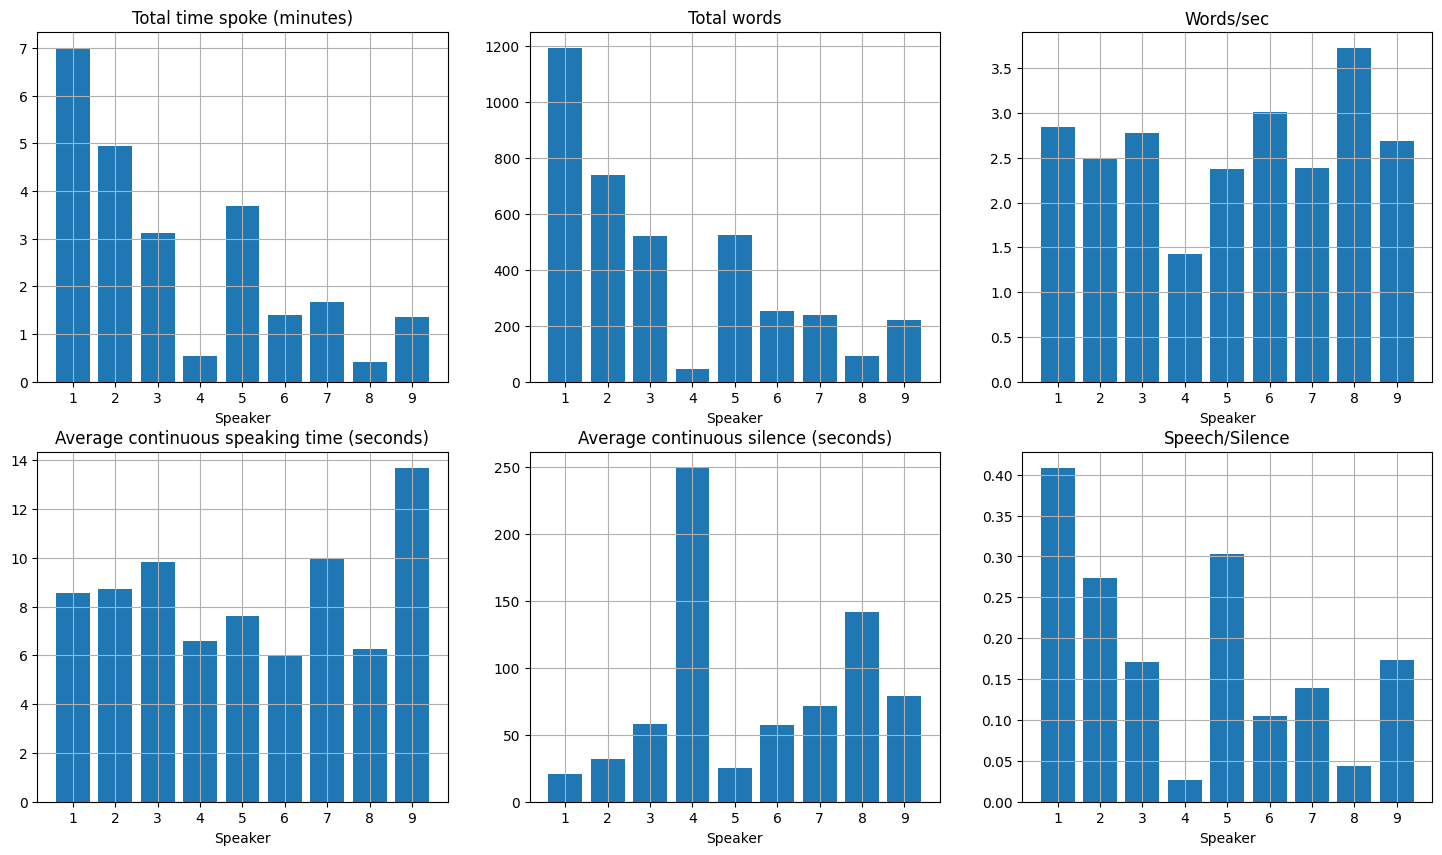

In [293]:
gb = word_count.sort_values (by= ['speaker', "start"]).groupby ("speaker") # 1 -> 9
words_per_sec_ind, speakers, total_words_ind, total_time_ind = [], [], [], []
average_speaking_time_ind, continous_silence_time_ind = [], []

for speaker, val in gb:
    words_per_sec_ind.append (val ["word_count"].sum() / val ["diff_sec"].sum())
    total_words_ind.append (val ["word_count"].sum())
    total_time_ind.append (val ["diff_sec"].sum() / 60)
    average_speaking_time_ind.append (val ["diff_sec"].mean ())
    continous_silence_time_ind.append (np.mean (continuous_silence (val, word_count ["end"].values [-1])))
    speakers.append (speaker)

speaking_vs_silence_avg_ind = np.array (average_speaking_time_ind) / np.array (continous_silence_time_ind)

fig, ax = plt.subplots (ncols= 3, nrows= 2, figsize= (18, 10))
ax [0][2].bar (speakers, words_per_sec_ind)
ax [0][1].bar (speakers, total_words_ind)
ax [0][0].bar (speakers, total_time_ind)
ax [1][0].bar (speakers, average_speaking_time_ind)
ax [1][1].bar (speakers, continous_silence_time_ind)
ax [1][2].bar (speakers, speaking_vs_silence_avg_ind)

ax [0][0].grid()
ax [1][1].grid()
ax [0][1].grid()
ax [0][2].grid()
ax [1][0].grid()
ax [1][2].grid()

ax [0][2].set_title ("Words/sec");
ax [0][1].set_title ("Total words");
ax [0][0].set_title ("Total time spoke (minutes)");
ax [1][0].set_title ("Average continuous speaking time (seconds)");
ax [1][1].set_title ("Average continuous silence (seconds)");
ax [1][2].set_title ("Speech/Silence");
ax [0][0].set_xlabel ('Speaker');
ax [0][1].set_xlabel ('Speaker');
ax [0][2].set_xlabel ('Speaker');
ax [1][0].set_xlabel ('Speaker');
ax [1][1].set_xlabel ('Speaker');
ax [1][2].set_xlabel ('Speaker');

print ("Average number of words per secnod: " + str(word_count ["word_count"].sum () / word_count ["diff_sec"].sum ()))
print ("Average continuous speaking time: " + str(word_count ["diff_sec"].mean ()) + " seconds")
print ("Average speech/silence ratio: " + str(np.mean (speaking_vs_silence_avg_ind)))

## Individual engagement

tao = avg avg time per speech\
n = number of participants\
n_s = total number of speeches

engagement factors:
1. %time you spoke
2. avg speech time vs tao
3. average silence time vs tao * (n-1)
4. your number of speeches vs n_s

let us define each participant's engagement as ("1" + "2" + "3" + "4") / 4


## Total Meeting score
#Note: This is all under the assumption that in a perfect meeting everyone has the exact same engagement



in a perfect meeting "1" = "4" = 1/n, "2" = "3" = 1. let us divide "2" and "3" by n\
-> the total score (sum of engagements)is 1\
or else, the total score is less, meaning the meeting was "(total score)% perfect"

for example - if the meeting is "perfect" but one participant had 1/n + 1 speeches and one had 1/n - 1 \
the first one gets less than 1/n engagement points, the latter gets more than 1/n engagement points \
and everybody else gets exactly 1/n, but together they will have less than 1.

We need the addition to be weaker than the contraction, so we will use negative exponents with semi-random power to strengthen



In [338]:
grades = pd.DataFrame (columns= ["speaker", "G1", "G2", "G3", "G4", "engagement"])
total_meeting_time = int (str(word_count ["end"].values [-1])[:2]) * 3600 + int (str(word_count ["end"].values [-1])[3:5]) * 60 + int (str(word_count ["end"].values [-1])[6:]) # sec
tao = word_count ["diff_sec"].mean () # sec
n = len (speakers)
n_s = len (word_count)
for speaker, val in gb:
    g1 = val ["diff_sec"].sum() / total_meeting_time
    g2 = val ["diff_sec"].mean() / tao 
    g3 = np.mean (continuous_silence (val, word_count ["end"].values [-1])) / (tao* (n-1))
    g4 = len (val) / n_s
    g = (g1 + g2/n + g3/n + g4) / 4
    grades.loc [len (grades), :] = [speaker, g1, g2, g3, g4, g]

In [340]:
grades ["engagement"].sum() # Should be 1 but it isn't thanks to noise

1.0511869246423398

In [354]:
# Meeting Grade
power = 40 # Determines how fast the grade is "ruined"
meeting_grade = ((np.e ** (-np.array (grades ["engagement"]))).sum() / (n * np.e ** (-1/n))) ** power
meeting_grade

0.811229306261999